In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
#inbuilt libraries
import random
from datetime import datetime
import os

#third party libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from IPython.display import display
import matplotlib.dates as mdates

#stat libraries
from scipy.stats import stats
import statsmodels.api as sm
from statsmodels.stats.power import TTestIndPower, tt_ind_solve_power
from statsmodels.stats.weightstats import ttest_ind
from statsmodels.stats.proportion import proportions_chisquare, confint_proportions_2indep

#warnings
import warnings
warnings.filterwarnings("ignore")

#SEED
SEED = 123
random.seed(SEED)

In [4]:
# extract the dataset
DATA_PATH = os.path.join("/home","akshay","Desktop", "Data")

In [5]:
def load_data(data_path = DATA_PATH, data_file = "pretest"):
    df = os.path.join(data_path, data_file + ".csv")
    return pd.read_csv(df)

In [6]:
pretest = load_data() # pretest file

In [7]:
test = load_data(data_file="test") # test file

# Table Summary

In [8]:
#head of the table
pretest.head()

,visitor_id,date,email,experiment,group,submitted
0,1,2021-12-01,NaN,NaN,NaN,0
1,2,2021-12-01,NaN,NaN,NaN,0
2,3,2021-12-01,NaN,NaN,NaN,0
3,4,2021-12-01,NaN,NaN,NaN,0
4,5,2021-12-01,NaN,NaN,NaN,0


In [9]:
# last 5 rows
pretest.tail()

,visitor_id,date,email,experiment,group,submitted
309898,309899,2021-12-31,scalderon@example.net,NaN,NaN,1
309899,309900,2021-12-31,NaN,AA_test,0.0,0
309900,309901,2021-12-31,NaN,NaN,NaN,0
309901,309902,2021-12-31,NaN,NaN,NaN,0
309902,309903,2021-12-31,NaN,NaN,NaN,0


In [10]:
#check the data types of each variable
pretest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309903 entries, 0 to 309902
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   visitor_id  309903 non-null  int64  
 1   date        309903 non-null  object 
 2   email       31295 non-null   object 
 3   experiment  30039 non-null   object 
 4   group       30039 non-null   float64
 5   submitted   309903 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 14.2+ MB


In [11]:
# get the basic stats of the data
pretest.describe()

,visitor_id,group,submitted
count,309903.000000,30039.000000,309903.000000
mean,154952.000000,0.501248,0.100983
std,89461.434574,0.500007,0.301307
min,1.000000,0.000000,0.000000
25%,77476.500000,0.000000,0.000000
50%,154952.000000,1.000000,0.000000
75%,232427.500000,1.000000,0.000000
max,309903.000000,1.000000,1.000000


In [12]:
# change the data type to the respective data type back to the attributes
pretest['date'] = pd.to_datetime(pretest['date'])
test['date'] = pd.to_datetime(test['date'])

In [13]:
#check the data types again
pretest.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309903 entries, 0 to 309902
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   visitor_id  309903 non-null  int64         
 1   date        309903 non-null  datetime64[ns]
 2   email       31295 non-null   object        
 3   experiment  30039 non-null   object        
 4   group       30039 non-null   float64       
 5   submitted   309903 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139959 entries, 0 to 139958
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   visitor_id  139959 non-null  int64         
 1   date        139959 non-null  datetime64[ns]
 2   email       14602 non-null   object        
 3   experiment  30081 non-null   object        
 4   group  

In [14]:
print(pretest['experiment'].value_counts())
print(pretest['group'].value_counts())
pretest['submitted'].value_counts()

AA_test    30039
Name: experiment, dtype: int64
1.0    15057
0.0    14982
Name: group, dtype: int64


0    278608
1     31295
Name: submitted, dtype: int64

In [15]:
#min date and maximum date for pretest
pretest['date'].min()
pretest['date'].max()

Timestamp('2021-12-01 00:00:00')

Timestamp('2021-12-31 00:00:00')

In [16]:
#min date and max date for test set
test['date'].min()
test['date'].max()

Timestamp('2022-02-01 00:00:00')

Timestamp('2022-02-14 00:00:00')

In [17]:
# Total numbers of visitors?
print(f"Total number of Visitors: {pretest['visitor_id'].count()}")

# What is the total number of sign-ups?
print(f"The total number of sign-ups: {pretest['submitted'].sum()}")


# What is the sign-up rate?
print(f"The signup rate is: {pretest['submitted'].mean()*100:.3f}%")

Total number of Visitors: 309903
The total number of sign-ups: 31295
The signup rate is: 10.098%


Text(0.5, 1.0, 'Visitors Per Day')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Visitors')

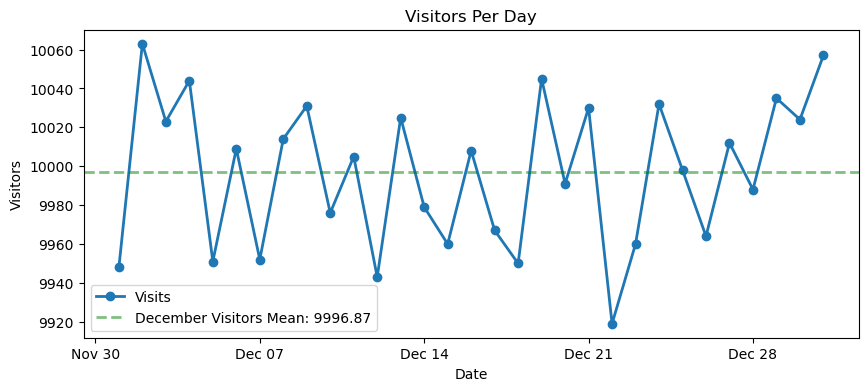

In [18]:
# Visual Analysis

#visitors per day
visitors_per_day = pretest.groupby('date')['submitted'].count()
visitors_mean = visitors_per_day.mean()

f, ax = plt.subplots(figsize = (10, 4))
plt.plot(visitors_per_day.index, visitors_per_day, '-o', linewidth = 2, label = "Visits")
plt.axhline(visitors_mean, linestyle = "--", linewidth = 2, alpha = 0.5, color="g", label = f"December Visitors Mean: {visitors_mean:.2f}")

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
ax.set_title("Visitors Per Day")
ax.set_xlabel("Date")
ax.set_ylabel("Visitors")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Signup Rates Per Day')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Signup Rate')

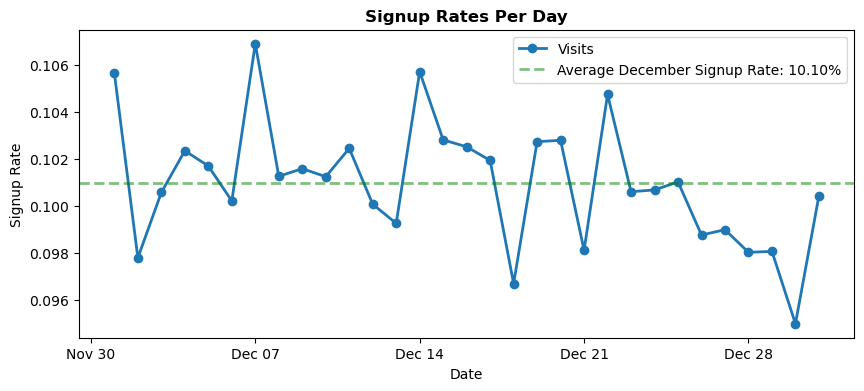

In [19]:
# Sign-ups per day
signup_per_day = pretest.groupby('date')['submitted'].mean()
signup_mean = signup_per_day.mean()

f, ax = plt.subplots(figsize = (10, 4))
plt.plot(signup_per_day.index, signup_per_day, '-o', linewidth = 2, label = "Visits")
plt.axhline(signup_mean, linestyle = "--", linewidth = 2, alpha = 0.5, color="g", label = f"Average December Signup Rate: {signup_mean*100:.2f}%")

ax.xaxis.set_major_locator(mdates.DayLocator(interval=7))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
ax.set_title("Signup Rates Per Day", weight="bold")
ax.set_xlabel("Date")
ax.set_ylabel("Signup Rate")
plt.legend()
plt.show()

# State the Hypothesis

### Ho: The signup rates for both blue (control) and green (treatment) buttons are same.
### Ha: The signup rates for blue (control) and green (treatment) buttons are different.

In [20]:
# set the alpha
alpha = 0.05 # moderate risk threshold.
power = 0.80 # Industry standards.80% chance of detecting an effect with statistical significance.
mde = 0.10 # Expect 10% improvement in the signup rate with statistical significance

#proportions if the effect exist
p1 = 0.10 # control group (blue)
p2 = p1 * (1 + p1) # Treatment group (green)

# Design The Experiment

To detect an effect of 10.00% lift from the pretest signup rate of 10.00%
The sample size required for each group is: 15000 and total number of samples required is: 30000


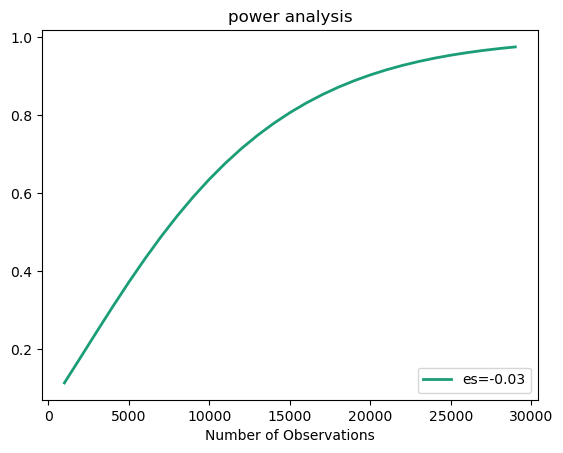

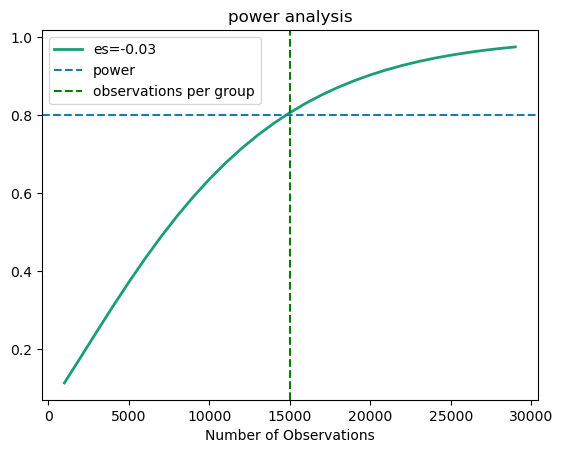

In [21]:
#calculate the effect size using Cohen's D distance
Cohen_D = sm.stats.proportion_effectsize(p1, p2) # cohen's D distance to detect the effect size

#estimating the sample size for each group (as there are two groups ---> Control and Treatment)
n = tt_ind_solve_power(effect_size= Cohen_D, power= power, alpha=alpha)

n = int(round(n, -3)) # rounding it to the nearest thousand values

print(f"To detect an effect of {100*(p2 / p1 - 1):.2f}% lift from the pretest signup rate of {100* p1:.2f}%\nThe sample size required for each group is: {n} and total number of samples required is: {2*n}")


ttest_power = TTestIndPower()
ttest_power.plot_power(dep_var="nobs", nobs=np.arange(1000, 30000, 1000), effect_size=[Cohen_D], title = "power analysis")
plt.axhline(0.8, linestyle = "--", label = "power")
plt.axvline(n, linestyle = "--", color='g', label = "observations per group")
plt.legend()
plt.show()

In [22]:
n

15000

# Experiment Duration

In [31]:
# What's the duration required to achieve the required sample size?

#allocation
alloc = np.arange(0.1, 1.1, 0.1)
#size
size = round(visitors_mean, -3) * alloc
#days
days = np.ceil(n*2 / size)

Text(0.5, 1.0, 'Days Required to Achieve the sample size given traffic allocation')

Text(0.5, 0, '% of traffic given')

Text(0, 0.5, 'Number of Days')

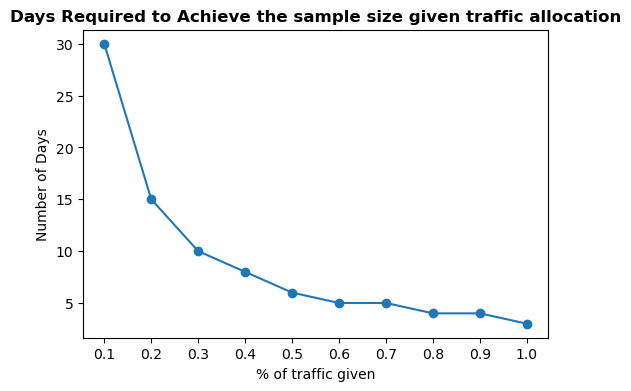

In [37]:
f, ax = plt.subplots(figsize = (6, 4))
ax.plot(alloc, days, '-o')
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.set_title("Days Required to Achieve the sample size given traffic allocation", weight = "bold")
ax.set_xlabel("% of traffic given")
ax.set_ylabel("Number of Days")
plt.show()

Text(0.5, 1.0, 'Estimation of the sample size given # of traffic allocation per day')

Text(0.5, 0, '# of traffic given per day')

Text(0, 0.5, 'Number of Days')

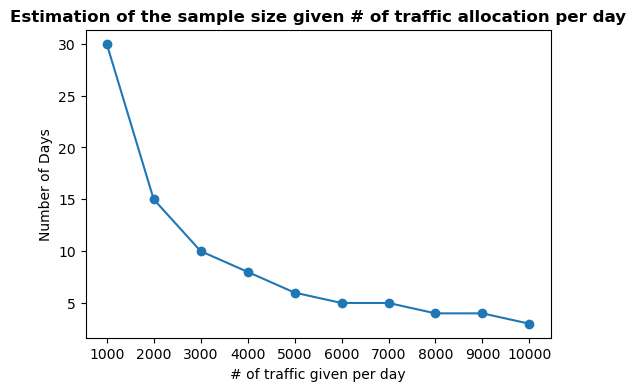

In [41]:
f, ax = plt.subplots(figsize = (6, 4))
ax.plot(size, days, '-o')
ax.xaxis.set_major_locator(MultipleLocator(1000))
ax.set_title("Estimation of the sample size given # of traffic allocation per day", weight = "bold")
ax.set_xlabel("# of traffic given per day")
ax.set_ylabel("Number of Days")
plt.show()

In [48]:
print(f"for a 21 day experiment {np.ceil(2*n/21)} users are required per day") # This is too long to wait
print(f"for a 14 day experiment {np.ceil(2*n / 14)} users are required per day") # This is ideal in terms of time and risk
print(f"for a 7 day experiment {np.ceil(2*n/7)} users are required per day") # This is risky in the industry

for a 21 day experiment 1429.0 users are required per day
for a 14 day experiment 2143.0 users are required per day
for a 7 day experiment 4286.0 users are required per day


### We will go ahead with 14 day experiment containing 2143 users per day

# Run the Experiment

In [51]:
pretest[pretest['experiment']=="AA_test"]

,visitor_id,date,email,experiment,group,submitted
169901,169902,2021-12-18,NaN,AA_test,0.0,0
169905,169906,2021-12-18,NaN,AA_test,0.0,0
169912,169913,2021-12-18,NaN,AA_test,1.0,0
169913,169914,2021-12-18,NaN,AA_test,0.0,0
169916,169917,2021-12-18,odonnelldaniel@example.com,AA_test,0.0,1
...,...,...,...,...,...,...
309890,309891,2021-12-31,NaN,AA_test,1.0,0
309892,309893,2021-12-31,NaN,AA_test,0.0,0
309893,309894,2021-12-31,NaN,AA_test,0.0,0
309894,309895,2021-12-31,adamcaldwell@example.org,AA_test,1.0,1


In [88]:
AA_test_signups_per_day

group  date      
0.0    2021-12-18    0.102061
       2021-12-19    0.109448
       2021-12-20    0.103993
       2021-12-21    0.097312
       2021-12-22    0.090909
       2021-12-23    0.102197
       2021-12-24    0.107790
       2021-12-25    0.100000
       2021-12-26    0.103933
       2021-12-27    0.105601
       2021-12-28    0.089483
       2021-12-29    0.105973
       2021-12-30    0.091866
       2021-12-31    0.110161
1.0    2021-12-18    0.092864
       2021-12-19    0.094843
       2021-12-20    0.101599
       2021-12-21    0.110595
       2021-12-22    0.101301
       2021-12-23    0.107763
       2021-12-24    0.102370
       2021-12-25    0.096451
       2021-12-26    0.108534
       2021-12-27    0.090317
       2021-12-28    0.088393
       2021-12-29    0.103641
       2021-12-30    0.089768
       2021-12-31    0.095023
Name: submitted, dtype: float64

In [92]:
range(1, AA_test['date'].nunique()+1)

range(1, 15)

The control signup rate: 10.1%
The treatment signup rate: 9.882%


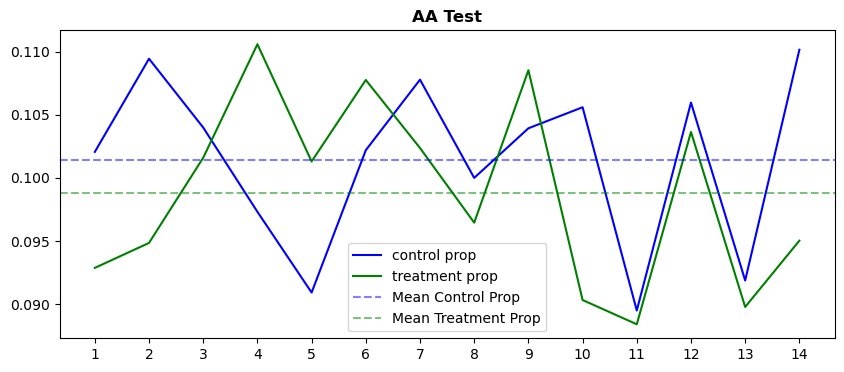

In [101]:
# AA Test --- To check whether to go with AB test or not
AA_test = pretest[pretest['experiment']=="AA_test"]
AA_test_control = AA_test[AA_test['group']==0]['submitted']
AA_test_treatment = AA_test[AA_test['group']==1]['submitted']

#get the stats
AA_test_control_count = AA_test_control.sum()
AA_test_treatment_count = AA_test_treatment.sum()

#rates
AA_test_control_rate = AA_test_control.mean()
AA_test_treatment_rate = AA_test_treatment.mean()

#size
AA_test_control_size = AA_test_control.count()
AA_test_treatment_size = AA_test_treatment.count()

#overview
print(f"The control signup rate: {100*AA_test_control_rate:.1f}%")
print(f"The treatment signup rate: {100*AA_test_treatment_rate:.3f}%")


#visual representation
AA_test_signups_per_day = AA_test.groupby(['group', 'date'])['submitted'].mean()
AA_test_control_props = AA_test_signups_per_day.loc[0]
AA_test_treatment_props = AA_test_signups_per_day.loc[1]

exp_days = range(1, AA_test['date'].nunique()+1)

f, ax = plt.subplots(figsize = (10, 4))
ax.plot(exp_days, AA_test_control_props, color="b", label = "control prop")
ax.plot(exp_days, AA_test_treatment_props, color="g", label = "treatment prop")
ax.axhline(AA_test_control_rate, linestyle = "--", color = "b", alpha= 0.5, label = "Mean Control Prop")
ax.axhline(AA_test_treatment_rate, linestyle = "--", color = "g", alpha= 0.5, label = "Mean Treatment Prop")
ax.set_xticks(exp_days)
ax.set_title("AA Test", weight = "bold")
plt.legend()
plt.show();

In [121]:
AA_test_stat, AA_test_pvalue, AA_test_tab = proportions_chisquare([AA_test_control_count, AA_test_treatment_count], 
                                                                 nobs= [AA_test_control_size, AA_test_treatment_size])

# get the dates
first_date = AA_test['date'].min().date()
last_date = AA_test['date'].max().date()
alpha = 0.05

#extract the insights
print(f"-----AA Test for {first_date} and {last_date}-----\n")
print("Ho: The signup rates between Blue and Green are same.")
print("\nHa: The signup rates between Blue and Green are different")
print(f"\nSignificance Level = {alpha}")

print(f"\nChisquare value : {AA_test_stat:.3f} | P-value : {AA_test_pvalue:.3f}\n")

if AA_test_pvalue < alpha:
    print("Reject the Ho: The signup rates between Blue and Green are same.\nPlease do not continue with AB Testing ")
else:
    print("Failed to reject Ho: The signup rates between Blue and Green are same.\nPlease carry on with AB Testing.")

-----AA Test for 2021-12-18 and 2021-12-31-----

Ho: The signup rates between Blue and Green are same.

Ha: The signup rates between Blue and Green are different

Significance Level = 0.05

Chisquare value : 0.577 | P-value : 0.448

Failed to reject Ho: The signup rates between Blue and Green are same.
Please carry on with AB Testing.


# SRM (Sample Ratio Mismatch)

In [148]:
# SRM (Sample Ratio Mismatch)


email_test = test[test['experiment']=="email_test"]

# Observed Values
observed = email_test.groupby("group")['experiment'].count().values

# Expected values
expected = [email_test.shape[0] * 0.5]*2

# peform the chisquare test
srm_stat, srm_pvalue = stats.chisquare(f_obs= observed, 
                f_exp=expected)

#alpha
alpha = 0.05

#print the results
print("---- A Chisquare Test for SRM -----\n")
print("Ho: The ratio of sample is 1:1")
print("Ha: The ratio of sample is not 1:1")
print(f"\nSignificance: {alpha}")

print(f"Chisquare: {srm_stat:.3f} | P-value: {srm_pvalue:.3f}")

if srm_pvalue < alpha:
    print("Reject the Ho: The ratio of sample is 1:1.\n\nThere is SRM (Sample Ratio Mismatch).")
else:
    print("Failed to reject the Ho: The ratio of sample is 1:1.\n\nThere is no SRM (Sample Ratio Mismatch).")

---- A Chisquare Test for SRM -----

Ho: The ratio of sample is 1:1
Ha: The ratio of sample is not 1:1

Significance: 0.05
Chisquare: 1.290 | P-value: 0.256
Failed to reject the Ho: The ratio of sample is 1:1.

There is no SRM (Sample Ratio Mismatch).


# Conduct the Statistical Inference

In [165]:
# AB testing
AB_TEST = test[test['experiment']=="email_test"]

# Control group
AB_test_control_signups = AB_TEST[AB_TEST['group']== 0]['submitted']
# Treatment Group
AB_test_treatment_signups = AB_TEST[AB_TEST['group']==1]['submitted']

#stats -- count
AB_test_control_count = AB_test_control_signups.sum()
AB_test_treatment_count = AB_test_treatment_signups.sum()

#stats -- rate
AB_test_control_rate = AB_test_control_signups.mean()
AB_test_treatment_rate = AB_test_treatment_signups.mean()

#stats -- size
AB_test_control_size = AB_test_control_signups.count()
AB_test_treatment_size = AB_test_treatment_signups.count()

#Signup overview
print(f"Control Signup Rate: {100*AB_test_control_rate:.2f}%")
print(f"Treatment Signup Rate: {100*AB_test_treatment_rate:.2f}%")

Control Signup Rate: 9.56%
Treatment Signup Rate: 10.78%


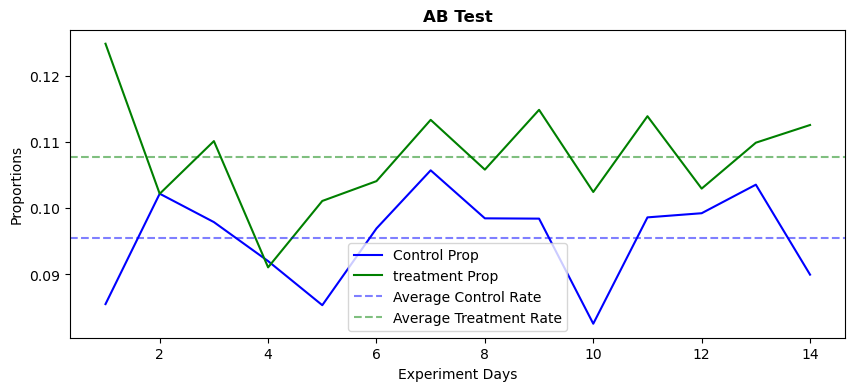

In [181]:
# signup per day
Ab_signup_per_day = AB_TEST.groupby(['group', 'date'])['submitted'].mean()
contrl_prop = Ab_signup_per_day.loc[0]
treatment_prop = Ab_signup_per_day.loc[1]

exp_days = range(1, AB_TEST['date'].nunique()+1)

f, ax = plt.subplots(figsize = (10, 4))
ax.plot(exp_days, contrl_prop, color = "b", label = "Control Prop")
ax.plot(exp_days, treatment_prop, color = "g", label = "treatment Prop")
ax.axhline(AB_test_control_rate, linestyle = "--", color = "b", alpha = 0.5, label = "Average Control Rate")
ax.axhline(AB_test_treatment_rate, linestyle = "--", color = "g", alpha = 0.5, label = "Average Treatment Rate")
ax.set_title("AB Test", weight = "bold")
ax.set_xlabel("Experiment Days")
ax.set_ylabel("Proportions")
plt.legend()
plt.show();

In [233]:
# Chisquare Test for Independence
Ab_test_stat, Ab_test_pvalue, Ab_test_tab = proportions_chisquare(count= [AB_test_control_count, AB_test_treatment_count], 
                                                                 nobs= [AB_test_control_size, AB_test_treatment_size])
ALPHA = 0.05
#first day
first_day = AB_TEST['date'].min().date()
#last day
last_day = AB_TEST['date'].max().date()

#Result
print(f"----- AB Test Email Signups {first_day} and {last_day} ----------------------")
print("\nHo:The signup rate between both blue and green are same.")
print("Ha: The signup rate between blue and green are different.")
print(f"\nSignificance: {ALPHA}")

print(f"Chisquare Value: {Ab_test_stat:.3f} | P-value: {Ab_test_pvalue:.3f}")


if Ab_test_pvalue < ALPHA:
    print("Reject the Ho:The signup rate between both blue and green are same.\nThere is a statistical significance in signup rates between blue and green button.")
else:
    print("Failed to reject the Ho:The signup rate between both blue and green are same.")
print("--"*50)    
print("\n")
    
    
    
    

# T-Test for Proportions
ttest_stat, ttest_pvalue, ttest_tab = ttest_ind(AB_test_control_signups, AB_test_treatment_signups)
#Result
print(f"----- T-Test for Email Signups {first_day} and {last_day} ----------------------")
print("\nHo:The signup rate between both blue and green are same.")
print("Ha: The signup rate between blue and green are different.")
print(f"\nSignificance: {ALPHA}")

print(f"Chisquare Value: {ttest_stat:.3f} | P-value: {ttest_pvalue:.3f}")


if ttest_pvalue < ALPHA:
    print("Reject the Ho:The signup rate between both blue and green are same.\nThere is a statistical significance in signup rates between blue and green button.")
else:
    print("Failed to reject the Ho:The signup rate between both blue and green are same.")
print("--"*50)    
print("\n")



# With confidence Intervals
ci = confint_proportions_2indep(AB_test_treatment_count, AB_test_treatment_size,
                          AB_test_control_count, AB_test_control_size, 
                          compare='diff',
                          alpha=0.05,
                               correction=True)
lower = ci[0]
upper = ci[1]
lower_lift = ci[0] / AB_test_control_rate
upper_lift = ci[1] / AB_test_control_rate

#sample size
print("----- Sample Size -----")
print(f"Control: {AB_test_control_size}")
print(f"Treatment: {AB_test_treatment_size}")

#signup count (rate)
print("\n----- Signup Count (Rate) -----")
print(f"Control Count: {AB_test_control_count}, Control Rate: {AB_test_control_rate * 100:.2f}")
print(f"Treatment Count: {AB_test_treatment_count}, Treatment Rate: {AB_test_treatment_rate * 100:.2f}")

#lift difference
print("\n----- Lift Difference -----")
print(f"Absolute Difference: {AB_test_treatment_rate - AB_test_control_rate}%")
print(f"Relative Difference (Lift): {(AB_test_treatment_rate - AB_test_control_rate) / AB_test_control_rate * 100:.2f}%")

# Tstats
print("\n----- T-stats -----")
print(f"T-Statistic: {ttest_stat}")
print(f"P-value: {ttest_pvalue}")

#Confidence Intervals
print("\n----- Confidence Intervals -----")
print(f"Absolute Difference: Lower CI: {lower:.3f}, Upper CI: {upper:.3f}")
print(f"Relative Difference (Lift): Lower Lift: {lower_lift * 100:.3f}, Upper Lift: {upper_lift*100:.3f}")
print("\n")
print("---"*40)


----- AB Test Email Signups 2022-02-01 and 2022-02-14 ----------------------

Ho:The signup rate between both blue and green are same.
Ha: The signup rate between blue and green are different.

Significance: 0.05
Chisquare Value: 12.312 | P-value: 0.000
Reject the Ho:The signup rate between both blue and green are same.
There is a statistical significance in signup rates between blue and green button.
----------------------------------------------------------------------------------------------------


----- T-Test for Email Signups 2022-02-01 and 2022-02-14 ----------------------

Ho:The signup rate between both blue and green are same.
Ha: The signup rate between blue and green are different.

Significance: 0.05
Chisquare Value: -3.509 | P-value: 0.000
Reject the Ho:The signup rate between both blue and green are same.
There is a statistical significance in signup rates between blue and green button.
------------------------------------------------------------------------------------

# Launch Decision

# We ran a two week randomized controlled experiment (02/01/2022) to (02/14/2022) that enrolled a sample of users in blue and green group.
# From the test, we observed a significant improvement of 12.8% lift from the benchmark (blue) at 9.6% with a statistical significance of 95% confidence interval between 5.7% and 19.9%.
# Given that we observed practical and statistical significance, our recommendation is to launch the new submit button in colour green.